Se cargan los datos por medio de la libreria Panda "import pandas as pd"

Se cargan los datos por medio de la libreria "numpy numpy as np"

Se cargan los datos por medio de la libreria matplotlib.pyplot "import matplotlib.pyplot as plt"

Se cargan los datos por medio de la libreria seaborn "import matplotlib.pyplot as plt"

Se leen los datos "df = pd.read_csv("./Ejercicio_2/International_Education_Costs.csv")"

Se muestran los dtos "df"

Se muestra la cantidad de columnas escritas "df.head(5)"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Ejercicio_2/International_Education_Costs.csv", index_col= ["Country"])
df
df.head(5)

,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
Country,,,,,,,,,,,
USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


Conocer el tipo de datos que tiene la fuente


In [2]:
df.dtypes

City                  object
University            object
Program               object
Level                 object
Duration_Years       float64
Tuition_USD            int64
Living_Cost_Index    float64
Rent_USD               int64
Visa_Fee_USD           int64
Insurance_USD          int64
Exchange_Rate        float64
dtype: object


Estadísticas descriptivas

In [3]:
display(df.describe(include='all'))

,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907,907,907,907,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
unique,556,622,92,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Singapore,University of Washington,Computer Science,Master,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,18,6,312,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,NaN,NaN,NaN,NaN,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,NaN,NaN,NaN,NaN,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,NaN,NaN,NaN,NaN,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,NaN,NaN,NaN,NaN,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,NaN,NaN,NaN,NaN,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000


Validar datos duplicados

In [4]:
duplicados = df.duplicated()
print("¿Se presentan datos duplicados?:", duplicados.any())
print("Número de filas duplicadas:", duplicados.sum())
df[duplicados]

¿Se presentan datos duplicados?: False
Número de filas duplicadas: 0


,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
Country,,,,,,,,,,,


Verificación valores nulos

In [5]:
display(df.isnull().sum())

City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64

Análisis gráfico

Histograma de columnas numéricas 

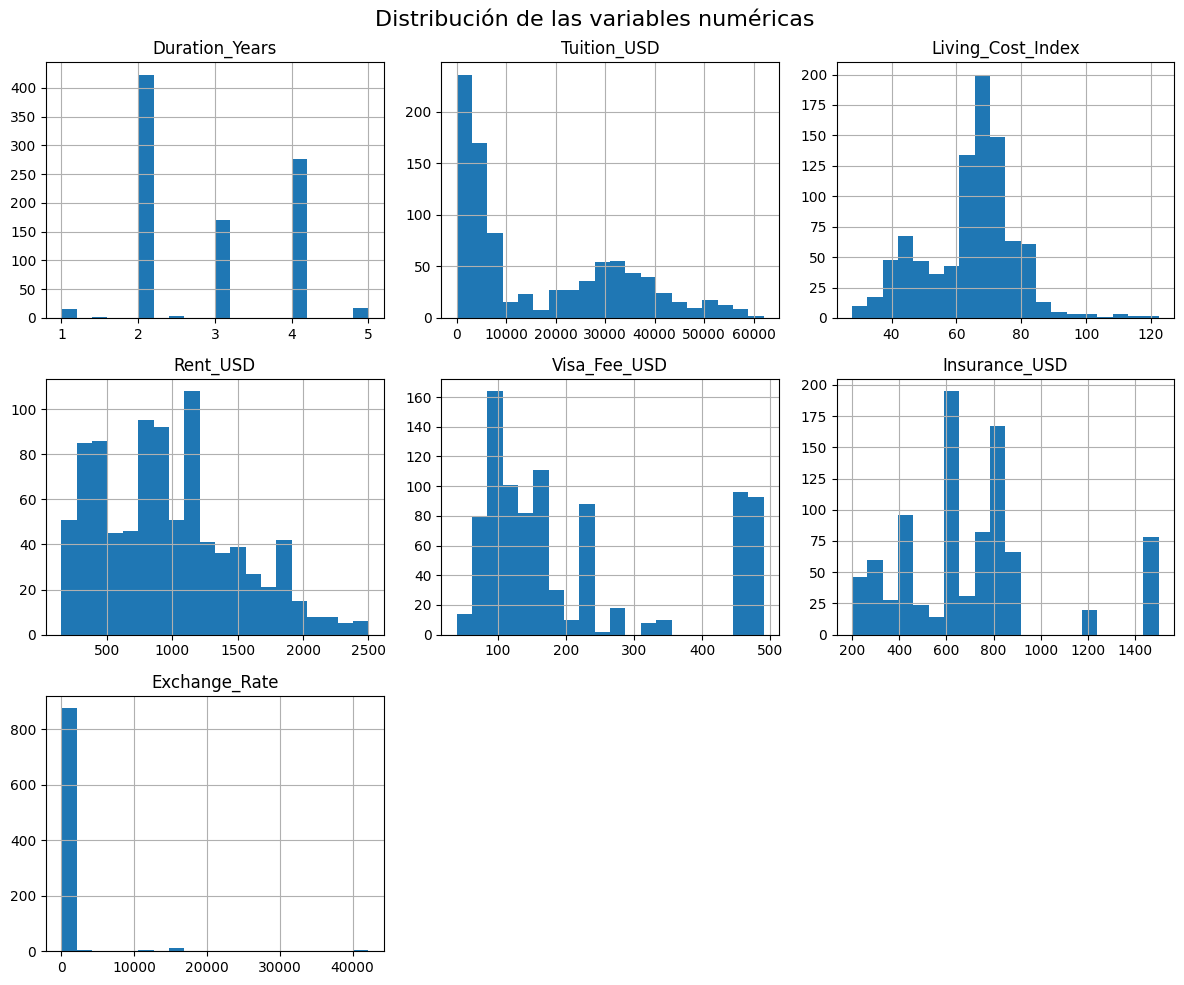

In [6]:
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribución de las variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()

Correlación entre variables numéricas

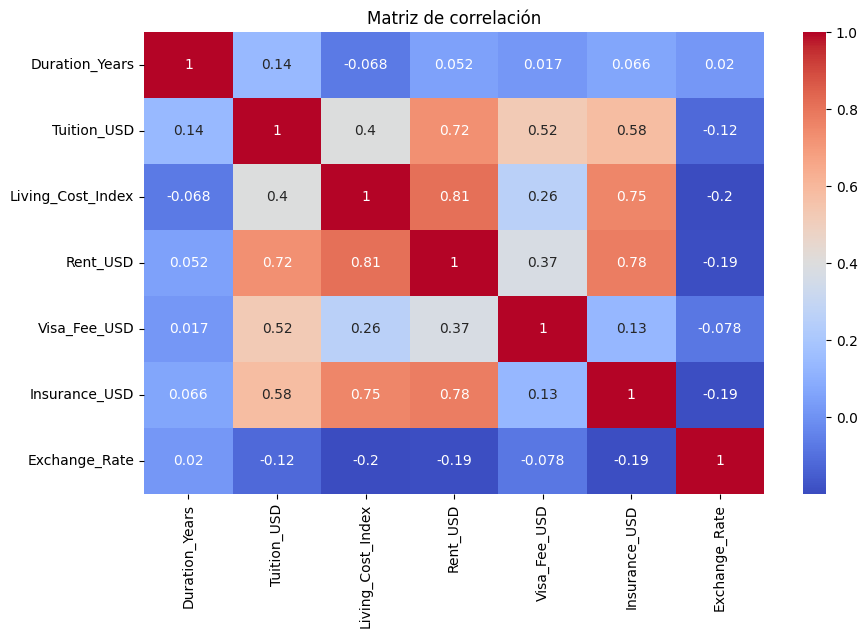

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Hallazgos Principales

Hallazgo 1: Universidad con matrícula más alta

In [8]:
top_tuition = df[['University', 'Tuition_USD']].sort_values(by='Tuition_USD', ascending=False).head(1)
print("\n Universidad con matrícula más alta:\n", top_tuition)


 Universidad con matrícula más alta:
                   University  Tuition_USD
Country                                  
USA      Columbia University        62000


Hallazgo 2: Universidad con matrícula más baja (excluyendo becas negativas si las hay)

In [9]:
lowest_tuition = df[['University', 'Tuition_USD']].sort_values(by='Tuition_USD').head(1)
print("\n Universidad con matrícula más baja:\n", lowest_tuition)


 Universidad con matrícula más baja:
                      University  Tuition_USD
Country                                     
Greece   University of Thessaly            0


Hallzgo 3: País con mayor índice de costo de vida promedio

In [10]:
avg_living_cost = df.groupby('Country')['Living_Cost_Index'].mean().sort_values(ascending=False).head(1)
print("\n País con mayor costo de vida promedio:\n", avg_living_cost)


 País con mayor costo de vida promedio:
 Country
Switzerland    97.82
Name: Living_Cost_Index, dtype: float64


Hallazgo 4: Duración promedio por nivel educativo

In [11]:
avg_duration_by_level = df.groupby('Level')['Duration_Years'].mean()
print("\n Duración promedio por nivel:\n", avg_duration_by_level)


 Duración promedio por nivel:
 Level
Bachelor    3.464646
Master      1.984479
PhD         4.081761
Name: Duration_Years, dtype: float64


Hallazgo 5: Ciudad con mayor renta promedio

In [12]:
top_rent = df[['City', 'Rent_USD']].sort_values(by='Rent_USD', ascending=False).head(1)
print("\n Ciudad con mayor renta mensual:\n", top_rent)


 Ciudad con mayor renta mensual:
              City  Rent_USD
Country                    
USA      New York      2500


Hallazgo 6: Países con mayor costo total promedio (matrícula + renta + seguro + visa)

In [13]:
df['Total_Cost_USD'] = df['Tuition_USD'] + df['Rent_USD'] + df['Insurance_USD'] + df['Visa_Fee_USD']
avg_total_cost_by_country = df.groupby('Country')['Total_Cost_USD'].mean().sort_values(ascending=False).head(3)

print("\n Los países con mayor costo total promedio:\n", avg_total_cost_by_country)



 Los países con mayor costo total promedio:
 Country
USA          51261.282051
Australia    37072.093023
Singapore    36456.666667
Name: Total_Cost_USD, dtype: float64


Grafico "Costo total promedio"


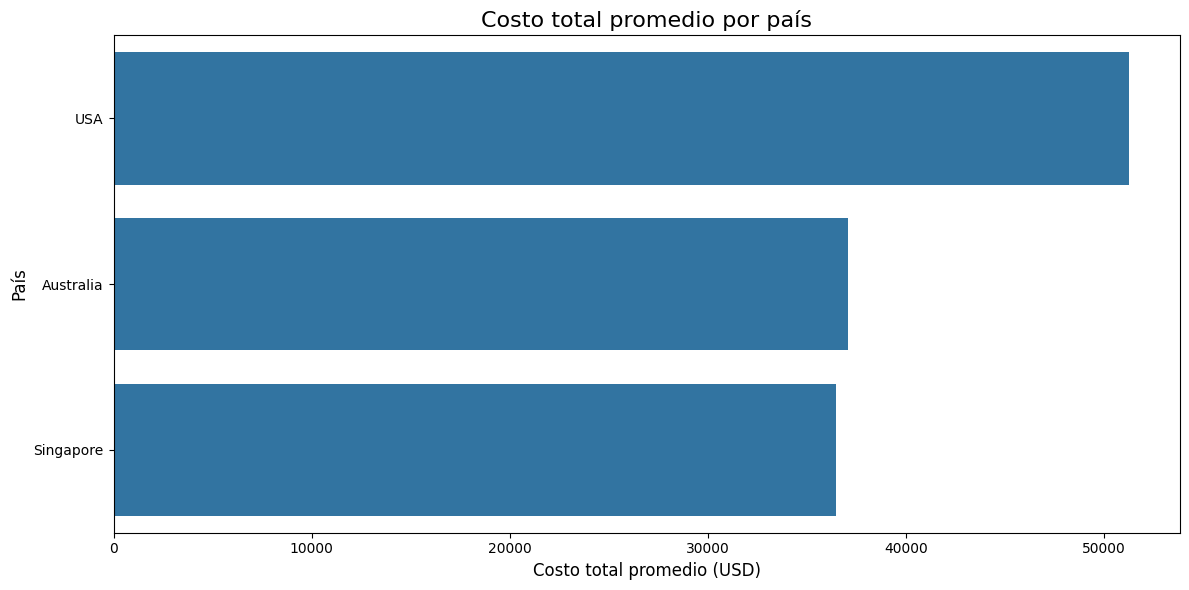

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_total_cost_by_country.values, y=avg_total_cost_by_country.index)
plt.title('Costo total promedio por país', fontsize=16)
plt.xlabel('Costo total promedio (USD)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()